# Adaboost ou XGBoost ?

Deux algorithmes de boosting connus sont Adaboost & XGBoost, voyons voir la performance de chacun de ces algorithmes sur le dataset d'AIRBNB Seattle. Notre but va être de prédire le prix d'un appartement en fonction des caractéristiques qu'on nous a donné. 

1. Importez les librairies usuelles 

In [31]:
import pandas as pd
import seaborn as sns

2. Importez le dataset ```listings.csv```

In [32]:
df = pd.read_csv("../../src/listings.csv", index_col=[0])
df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


3. On a beaucoup de données dans ce dataset. Affichez toutes les colonnes du dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 241032 to 10208623
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_url                       3818 non-null   object 
 1   scrape_id                         3818 non-null   int64  
 2   last_scraped                      3818 non-null   object 
 3   name                              3818 non-null   object 
 4   summary                           3641 non-null   object 
 5   space                             3249 non-null   object 
 6   description                       3818 non-null   object 
 7   experiences_offered               3818 non-null   object 
 8   neighborhood_overview             2786 non-null   object 
 9   notes                             2212 non-null   object 
 10  transit                           2884 non-null   object 
 11  thumbnail_url                     3498 non-null   object 
 1

4. Révisons un peu Seaborn, affichez la distribution des prix dans le dataset 

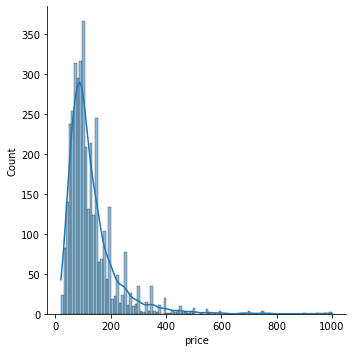

In [34]:
df.price = df.price.str[1:].replace(",", "", regex=True).astype(float)
sns.displot(df.price, kde=True)

5. Supprimez les outliers pour ne garder que les appartements qui ont un prix inférieur à 400$/nuit 

In [35]:
df = df.loc[df["price"] < 400.00,:]
df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.741000e+03,3.741000e+03,3739.000000,3739.000000,3741.000000,3741.000000,3741.000000,3725.000000,3735.000000,3740.000000,...,3112.000000,3101.000000,3106.000000,3101.000000,3108.000000,3104.000000,3103.000000,0.0,3741.000000,3131.00000
mean,2.016010e+13,1.580045e+07,7.159668,7.159668,47.628835,-122.332958,3.255547,1.230604,1.262115,1.681016,...,94.515746,9.635279,9.553767,9.784908,9.807915,9.607603,9.452143,NaN,2.946004,2.10007
std,0.000000e+00,1.459317e+07,28.763187,28.763187,0.043323,0.031760,1.841565,0.548142,0.812395,1.039788,...,6.592448,0.700346,0.799259,0.598798,0.571371,0.630123,0.749520,NaN,5.890650,1.82837
min,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.02000
25%,2.016010e+13,3.264544e+06,1.000000,1.000000,47.609070,-122.354142,2.000000,1.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.71000
50%,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623379,-122.328750,2.000000,1.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.56000
75%,2.016010e+13,2.596372e+07,3.000000,3.000000,47.662995,-122.310725,4.000000,1.000000,2.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.03000
max,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,10.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.15000


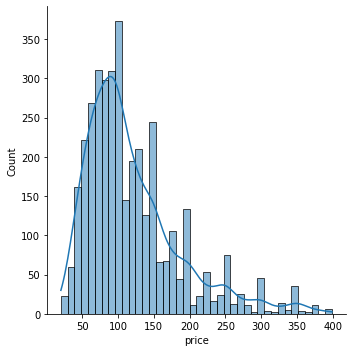

In [36]:
sns.displot(df.price, kde=True)

6. Exprimez le prix en fonction des variables suivantes : 

- ```room type```
- ```beds```
- ```property type```

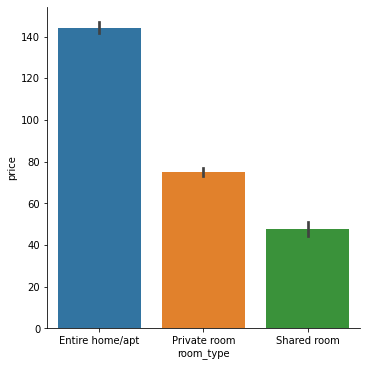

In [37]:
sns.catplot(x="room_type", y="price", data=df, kind="bar")

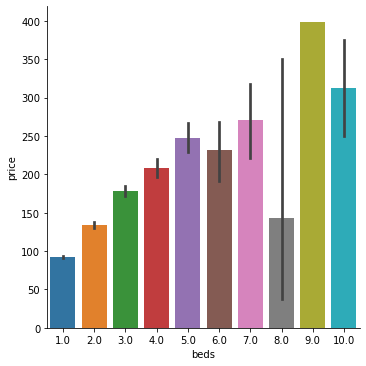

In [38]:
sns.catplot(x="beds", y="price", data=df, kind="bar")

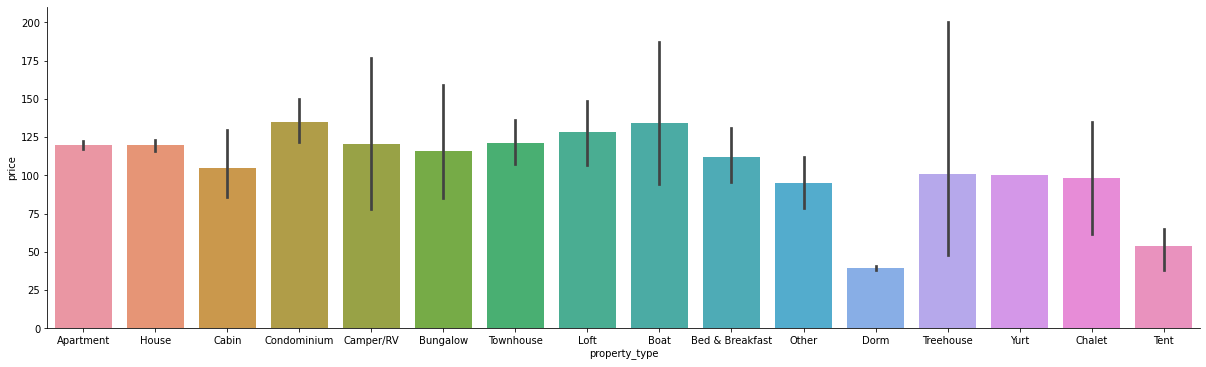

In [39]:
sns.catplot(x="property_type", y="price", data=df, kind="bar", aspect=30/9)

7. Séparez la variable cible de votre dataset

In [40]:
target_name = 'price'

X = df.loc[:,[c for c in df.columns if c!=target_name]]
y = df.loc[:,target_name]

8. Il faut qu'on écrème quelques variables explicatives de notre jeu de données. Commencer par simplement enlever les variables qui expriment un ```id``` quelconque ou urls. On enlèvera également les variables qui contiennent des textes longs comme ```notes```

De la même manière, on enlèvera  toutes les variables qui décrivent le prix mensuel ou hebdomadaire comme  ```monthly price```

Votre dataset devrait contenir uniquement les variables catégoriques et numériques une fois votre nettoyage fait. 

A la fin, votre dataset contiendra les variables suivantes : 

```
Index(['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')
```

In [41]:
keep_variables = ['host_response_time', 'host_response_rate',
                  'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
                  'host_total_listings_count', 'host_has_profile_pic',
                  'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
                  'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                  'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
                  'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
                  'has_availability', 'availability_30', 'availability_60',
                  'availability_90', 'availability_365', 'number_of_reviews',
                  'review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'requires_license', 'instant_bookable',
                  'cancellation_policy', 'require_guest_profile_picture',
                  'require_guest_phone_verification', 'calculated_host_listings_count',
                  'reviews_per_month']

X = X[keep_variables]

9 Reste-t-il des valeurs manquantes? Certaines peuvent elles être traîtées sans avoir recours à l'interpolation ? Les variables sont elles toutes dans un format adapté ? Si non appliquez des transformations adaptées.

In [42]:
print("Percentage of missing values: ")
display(((100*X.isnull().sum()/len(X)).sort_values(ascending=False)))

Percentage of missing values: 


security_deposit                    51.617215
cleaning_fee                        27.265437
host_acceptance_rate                19.887731
review_scores_accuracy              17.107725
review_scores_checkin               17.107725
review_scores_value                 17.054264
review_scores_location              17.027533
review_scores_cleanliness           16.974071
review_scores_communication         16.920609
review_scores_rating                16.813686
reviews_per_month                   16.305801
host_response_rate                  13.552526
host_response_time                  13.552526
bathrooms                            0.427693
bedrooms                             0.160385
host_is_superhost                    0.053462
host_listings_count                  0.053462
host_total_listings_count            0.053462
host_has_profile_pic                 0.053462
host_identity_verified               0.053462
property_type                        0.026731
beds                              

10. Vérifiez que toutes les variables numériques le sont effectivement bien. (N'oubliez pas de regarder y)

In [43]:
df.describe(include='object')  

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3741,3741,3741,3566,3182,3741,3741,2730,2165,2826,...,3741,3741,3131,3131,3741,3741,3741,3741,3741,3741
unique,3741,1,3715,3404,3053,3665,1,2454,1957,2525,...,1,1,979,317,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/9823290,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3741,3,15,14,10,3741,17,38,31,...,3741,3741,24,94,3741,3741,3158,1365,3426,3372


In [44]:
column = ["security_deposit", "cleaning_fee", "extra_people"]
for col in column:
    X[col] = X[col].str[1:].replace(",", "", regex=True).astype(float)
    X[col].fillna(0, inplace=True)

In [45]:
column = ["require_guest_phone_verification", "require_guest_profile_picture", "instant_bookable", "requires_license", 
          "has_availability", "host_is_superhost", "host_has_profile_pic", "host_identity_verified"]
for col in column:
    X[col] = (X[col] == "t").astype(int)

In [46]:
column = ["host_response_rate", "host_acceptance_rate"]

for col in column:
    X[col] = X[col].str[:-1].astype(float)/100.0
    X[col].fillna(0, inplace=True)

In [47]:
X.host_response_time.replace({"within an hour":1, "within a few hours":2, "within a day":3, "a few days or more":4}, 
                              inplace=True)

X.cancellation_policy.replace({"flexible":1, "moderate":2, "strict":3, "a few days or more":4}, inplace=True)

11. Séparez les variables en deux groupes, les variables numériques d'un côté et les qualitatives de l'autre.

In [48]:
import numpy as np
num_col = X.select_dtypes([np.number]).columns
name_col = X.select_dtypes("object").columns

In [49]:
X[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 241032 to 10208623
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                3234 non-null   float64
 1   host_response_rate                3741 non-null   float64
 2   host_acceptance_rate              3741 non-null   float64
 3   host_is_superhost                 3741 non-null   int64  
 4   host_listings_count               3739 non-null   float64
 5   host_total_listings_count         3739 non-null   float64
 6   host_has_profile_pic              3741 non-null   int64  
 7   host_identity_verified            3741 non-null   int64  
 8   latitude                          3741 non-null   float64
 9   longitude                         3741 non-null   float64
 10  accommodates                      3741 non-null   int64  
 11  bathrooms                         3725 non-null   float64
 1

12. Faites maintenant un ```train_test_split```

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

13. Normalisez ```X_train_num``` & ```X_test_num``` et rassemblez les deux groupes de variables

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat', categorical_transformer, name_col)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

15. Entrainez d'abord un modèle d'Adaboost standard et regardez votre score 


In [53]:
from sklearn.ensemble import AdaBoostRegressor 

regressor_ada = AdaBoostRegressor(random_state=0)
regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

0.4354200513410408

price    122.798935
dtype: float64

16. Entrainez ensuite un modèle XGBoost et regardez votre score 

In [54]:
! pip install xgboost

     |████████████████████████████████| 157.5 MB 46 kB/s s eta 0:00:01  |▏                               | 788 kB 7.1 MB/s eta 0:00:23


In [56]:
from xgboost import XGBRegressor

regressor_xgb = XGBRegressor(random_state=0)
regressor_xgb.fit(X_train, y_train)
regressor_xgb.score(X_test, y_test)

0.681206288383623

17. Par défaut, Adaboost prend des decision trees comme modèle a booster. Tentez de mettre une regression linéaire 

In [57]:
from sklearn.linear_model import LinearRegression

regressor_ada = AdaBoostRegressor(LinearRegression(), random_state=0)
regressor_ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), random_state=0)

In [58]:
regressor_ada.score(X_test, y_test)

0.18466020994184829

18. La régression linéaire n'était pas la meilleure idée mais peut être qu'on peut faire une grid_search sur le ```learning rate``` & ```n_estimators```pour rattraper le score de XGBoost ?

In [59]:
from sklearn.model_selection import GridSearchCV

regressor_ada = AdaBoostRegressor(random_state=0)
parameters = {'n_estimators':[10, 20, 30, 40, 50, 70, 100],
              "learning_rate":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5]}

regressor_ada_best = GridSearchCV(regressor_ada, parameters)
regressor_ada_best.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5],
                         'n_estimators': [10, 20, 30, 40, 50, 70, 100]})

In [60]:
regressor_ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 10}

In [64]:
print(f"Train score : {regressor_ada_best.best_estimator_.score(X_train, y_train)}, "
      f"Test score : {regressor_ada_best.best_estimator_.score(X_test, y_test)}")

Train score : 0.5741151601224992, Test score : 0.5690416471384887


---> Même avec beaucoup plus d'estimateurs, nous n'arrivons pas au score de XGBoost